In [1]:
using Pkg
Pkg.activate(".")
using MRSimulator
import Blink: Window, body!
using Plots
import RecipesBase: @shorthands, @userplot, @recipe, @series, AbstractPlot
import Statistics: mean
#plotlyjs()

  Activating new project at `~/.julia/dev/MRSimulator/examples`
┌ Info: Precompiling MRSimulator [eac06e4d-a854-4bf6-b44f-54c98b0401d1]
└ @ Base loading.jl:1423
┌ Warning: Package MRSimulator does not have RecipesBase in its dependencies:
│ - If you have MRSimulator checked out for development and have
│   added RecipesBase as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with MRSimulator
└ Loading RecipesBase into MRSimulator from project dependency, future warnings for MRSimulator are suppressed.


WebIO._IJuliaInit()

In [2]:
micro = Microstructure(off_resonance=field([.1, 0, 0], 0.))
spins = [Spin(position=[x, 0, 0]) for x in -10:10];

In [3]:
sequence = Sequence([
    RFPulse(flip_angle=90, phase=0, time=0.)
], 10.);

In [4]:
res = evolve(spins, micro, sequence);

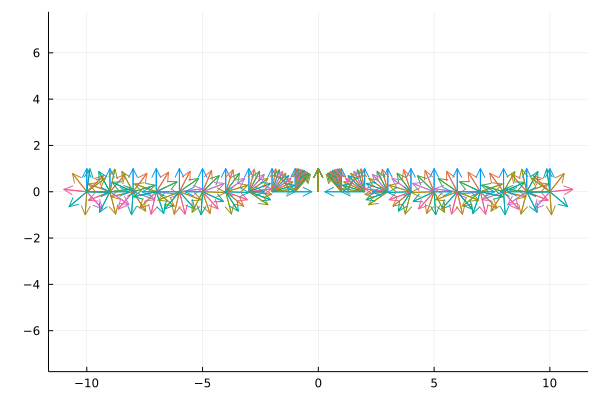

In [5]:
plot(legend=:left)
for spins in eachrow(res)
    spinquiver!(spins)
end
plot!()

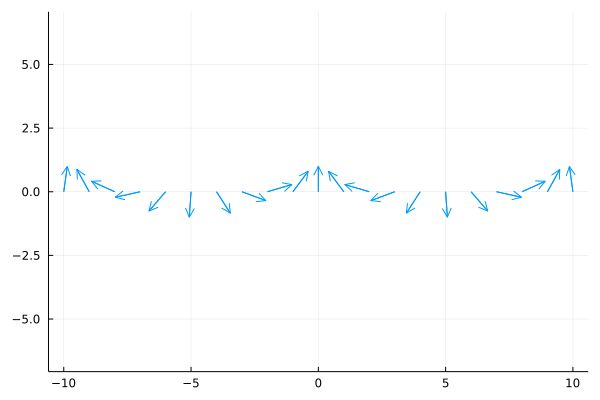

In [6]:
x = map(x -> x.position[1], res[1, :])
y = map(x -> x.position[2], res[1, :])
z = map(x -> x.position[2], res[1, :])
v1 = vector.(res)
u = map(x -> x[1], v1)
v = map(x -> x[2], v1)
w = map(x -> x[3], v1)
p = quiver(x, y, quiver=(u[9, :], v[9, :]), aspect_ratio=:equal, label="test")
#xlims!(-11, 11)
#ylims!(-1, 1)

In [7]:
vec[end, end]

LoadError: MethodError: no method matching axes(::typeof(vec), ::Int64)
[0mClosest candidates are:
[0m  axes([91m::Unzip.Rows[39m, ::Any...) at ~/.julia/packages/Unzip/Yiepw/src/Unzip.jl:68
[0m  axes([91m::Number[39m, ::Integer) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/number.jl:83
[0m  axes([91m::Base.Broadcast.Broadcasted{<:Any, <:Tuple{Vararg{T, N}} where T}[39m, ::Integer) where N at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/broadcast.jl:227
[0m  ...

In [ ]:
vec[end, :]

21-element Vector{StaticArraysCore.SVector{3, Float64}}:
 [0.9852984683212145, 1.0056125790669181e-16, 0.1708418225256004]
 [0.8075072303669992, 1.4714066794467442e-16, -0.5898576717353246]
 [0.13691577318564288, 1.7167799865707098e-16, -0.9905826926879844]
 [-0.6172317445536757, 7.558908802997957e-17, -0.7867814013531497]
 [-0.9946991192659652, 1.2181550925237556e-16, -0.10282831386108189]
 [-0.7651280358624956, 9.370116000569065e-17, 0.6438781629603537]
 [-0.0686196302526318, 3.8876718433850756e-17, 0.9976428952004781]
 [0.6697655134966707, 6.555284083839865e-17, 0.7425726610443862]
 [0.9994105500745122, 1.0892019311062583e-16, 0.03433005097230322]
 [0.7191418674268321, 1.5357040689850768e-16, -0.6948632775689393]
 [6.123233995736766e-17, 1.7225464241988333e-16, -1.0]
 [-0.7191418674268325, 8.806947860771206e-17, -0.6948632775689387]
 [-0.9994105500745122, 1.223924931182847e-16, 0.034330050972302316]
 [-0.6697655134966707, 8.202261922829811e-17, 0.7425726610443864]
 [0.06861963025263

In [ ]:
res[:, end]

11-element Vector{Spin}:
 Spin(0.0, Real[10, 0, 0], MRSimulator.SpinOrientation(6.123233995736766e-17, 1.0, 1.5707963267948966))
 Spin(1.0, Real[10, 0, 0], MRSimulator.SpinOrientation(1.1102230246251565e-16, 1.0, 2.3733628891148966))
 Spin(2.0, Real[10, 0, 0], MRSimulator.SpinOrientation(1.1102230246251565e-16, 1.0, 3.1759294514348966))
 Spin(3.0, Real[10, 0, 0], MRSimulator.SpinOrientation(1.1102230246251565e-16, 1.0, 3.9784960137548966))
 Spin(4.0, Real[10, 0, 0], MRSimulator.SpinOrientation(1.1102230246251565e-16, 1.0, 4.781062576074897))
 Spin(5.0, Real[10, 0, 0], MRSimulator.SpinOrientation(1.1102230246251565e-16, 1.0, 5.583629138394897))
 Spin(6.0, Real[10, 0, 0], MRSimulator.SpinOrientation(1.1102230246251565e-16, 1.0, 6.386195700714897))
 Spin(7.0, Real[10, 0, 0], MRSimulator.SpinOrientation(1.1102230246251565e-16, 1.0, 7.188762263034897))
 Spin(8.0, Real[10, 0, 0], MRSimulator.SpinOrientation(1.1102230246251565e-16, 1.0, 7.991328825354897))
 Spin(9.0, Real[10, 0, 0], MRSimulat

In [ ]:
vec[end, end]

3-element StaticArraysCore.SVector{3, Float64} with indices SOneTo(3):
 -0.9852984683212145
  1.206642615434365e-16
  0.1708418225256003